In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Chargement des données
df_caract = pd.read_csv(r"c:\Users\mehdi\Desktop\caract-2023.csv", sep = ";")

In [3]:
df_lieux = pd.read_csv(r"c:\Users\mehdi\Desktop\lieux-2023.csv", sep = ";")

C:\Users\mehdi\AppData\Local\Temp\ipykernel_4868\272202388.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lieux = pd.read_csv(r"c:\Users\mehdi\Desktop\lieux-2023.csv", sep = ";")


In [4]:
df_usagers = pd.read_csv(r"c:\Users\mehdi\Desktop\usagers-2023.csv", sep = ";")

In [5]:
df_vehicules = pd.read_csv(r"c:\Users\mehdi\Desktop\vehicules-2023.csv",sep = ";")

In [6]:
print(df_caract.columns)

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long'],
      dtype='object')


In [7]:
print(df_lieux.columns)

Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma'],
      dtype='object')


In [8]:
print(df_usagers.columns)

Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp'],
      dtype='object')


In [9]:
print(df_vehicules.columns)

Index(['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm',
       'choc', 'manv', 'motor', 'occutc'],
      dtype='object')


In [10]:
# Si des espaces sont présents dans les noms des colonnes, on peut les supprimer
df_caract.columns = df_caract.columns.str.strip()

In [11]:
# Si des espaces sont présents dans les noms des colonnes, on peut les supprimer
df_lieux.columns = df_lieux.columns.str.strip()

In [12]:
# Si des espaces sont présents dans les noms des colonnes, on peut les supprimer
df_usagers.columns = df_usagers.columns.str.strip()

In [13]:
# Si des espaces sont présents dans les noms des colonnes, on peut les supprimer
df_vehicules.columns = df_vehicules.columns.str.strip()

In [14]:
df_caract.drop(columns=['an', 'lum', 'com','adr'], inplace = True)

In [15]:
df_lieux.drop(columns=['v1', 'v2', 'nbv', 'vosp', 'pr', 'lartpc', 'larrout'], inplace=True, errors='ignore')

In [16]:
df_usagers.drop(columns=['an_nais', 'trajet', 'secu2', 'secu3', 'etatp'], inplace=True, errors='ignore')

In [17]:
df_vehicules.drop(columns=['motor', 'occutc'], inplace=True, errors='ignore')

In [18]:
for col in df_usagers.select_dtypes(include="object"):
    try:
        df_usagers[col] = pd.to_numeric(df_usagers[col], errors="coerce")
    except:
        pass


In [19]:
for col in df_caract.select_dtypes(include="object"):
    try:
        df_caract[col] = pd.to_numeric(df_caract[col], errors="coerce")
    except:
        pass


In [20]:
for col in df_vehicules.select_dtypes(include="object"):
    try:
        df_vehicules[col] = pd.to_numeric(df_vehicules[col], errors="coerce")
    except:
        pass


In [21]:
for col in df_lieux.select_dtypes(include="object"):
    try:
        df_lieux[col] = pd.to_numeric(df_lieux[col], errors="coerce")
    except:
        pass


In [22]:
df_merged = df_caract.merge(df_lieux, on='Num_Acc').merge(df_vehicules, on='Num_Acc').merge(df_usagers, on='Num_Acc')

In [23]:
df_merged.drop_duplicates(inplace=True)

In [24]:
df_merged.drop(columns=['infra','jour', 'dep', 'voie','pr1','id_vehicule_y', 'num_veh_x', 'num_veh_y','senc','senc', 'obs', 'manv','lat','long','hrmn','id_vehicule_x','id_usager','locp','actp'], inplace = True)

In [25]:
df_merged.columns


Index(['Num_Acc', 'mois', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'prof',
       'plan', 'surf', 'situ', 'vma', 'catv', 'obsm', 'choc', 'place', 'catu',
       'grav', 'sexe', 'secu1'],
      dtype='object')

In [26]:
print("\nFinal Merged DataFrame Info:")
print(df_merged.info())
print("\nMissing Values:")
print(df_merged.isna().sum())


Final Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 271560 entries, 0 to 309340
Data columns (total 21 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  271560 non-null  int64
 1   mois     271560 non-null  int64
 2   agg      271560 non-null  int64
 3   int      271560 non-null  int64
 4   atm      271560 non-null  int64
 5   col      271560 non-null  int64
 6   catr     271560 non-null  int64
 7   circ     271560 non-null  int64
 8   prof     271560 non-null  int64
 9   plan     271560 non-null  int64
 10  surf     271560 non-null  int64
 11  situ     271560 non-null  int64
 12  vma      271560 non-null  int64
 13  catv     271560 non-null  int64
 14  obsm     271560 non-null  int64
 15  choc     271560 non-null  int64
 16  place    271560 non-null  int64
 17  catu     271560 non-null  int64
 18  grav     271560 non-null  int64
 19  sexe     271560 non-null  int64
 20  secu1    271560 non-null  int64
dtypes: int64

In [27]:
df_merged.dropna(inplace=True)

In [28]:
df = df_merged

In [29]:
# Classe
df['atm'] = df['atm'].replace({2: 7, 3: 7, 4: 8, 5: 8, 6: 9}).astype(str)
df['col'] = df['col'].replace({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 4}).astype(str)
df['catr'] = df['catr'].replace({1: 1, 2: 1, 3: 1, 7: 1, 4: 2, 5: 2, 6: 2, 9: 2}).astype(str)
df['circ'] = df['circ'].replace({1: 1, 2: 1, 3: 2, 4: 2}).astype(str)
df['surf'] = df['surf'].replace({2: 2, 3: 2, 4: 3, 5: 3, 7: 3, 6: 4, 8: 4}).astype(str)
df['catv'] = df['catv'].replace({
    1: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1,
    7: 2, 10: 2,
    13: 3, 14: 3, 15: 3, 16: 3, 17: 3,
    37: 4, 38: 4,
    39: 5, 40: 5,
    50: 6, 60: 6, 80: 6
}).astype(str)
df['obsm'] = df['obsm'].replace({1: 1, 2: 1, 4: 1, 5: 2, 6: 2, 9: 3}).astype(str)
df['choc'] = df['choc'].replace({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3}).astype(str)
df['catu'] = df['catu'].replace({1: 1, 2: 2, 3: 3}).astype(str)

df.head()

,Num_Acc,mois,agg,int,atm,col,catr,circ,prof,plan,...,situ,vma,catv,obsm,choc,place,catu,grav,sexe,secu1
0,202300000001,5,2,4,7,4,2,1,1,1,...,1,30,1,0,2,1,1,4,1,2
2,202300000002,5,2,1,7,3,1,1,1,1,...,1,50,2,1,1,1,1,1,2,1
3,202300000002,5,2,1,7,3,1,1,1,1,...,1,50,2,1,1,10,3,3,1,0
4,202300000003,5,2,3,7,1,1,1,1,1,...,1,50,2,1,1,1,1,3,1,2
5,202300000003,5,2,3,7,1,1,1,1,1,...,1,50,2,1,1,1,1,1,2,1


In [30]:
# Matrice de correlation
correlation_matrix = df.corr()

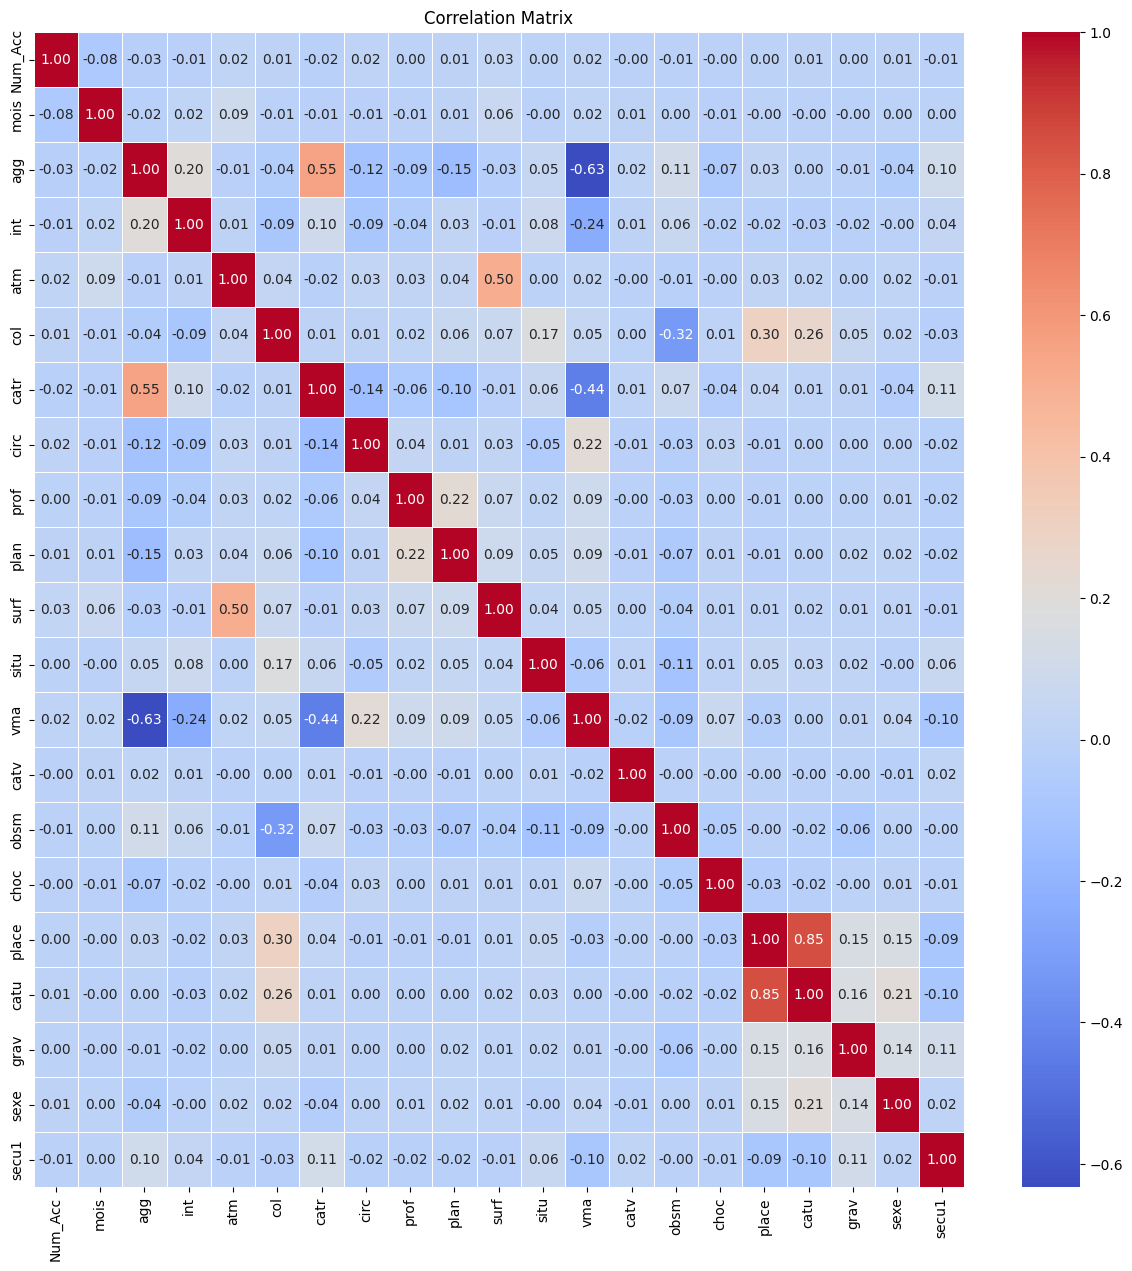

In [31]:
# heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [32]:
# retire les valeurs non-reseigné (-1)
df = df[~(df == -1).any(axis=1)]

In [33]:
categorical_columns = ['agg', 'int', 'atm', 'col', 'catr', 'circ', 'prof', 
                       'plan', 'surf', 'situ', 'catv', 'obsm', 
                       'choc', 'place', 'catu', 'sexe', 'secu1']

#encodage get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [34]:
df_encoded.dropna(inplace=True)

In [35]:
df_encoded.drop(columns=['Num_Acc'], inplace = True)

In [36]:
from sklearn.model_selection import train_test_split

target = 'grav'

X = df_encoded.drop(columns=[target])  # Features
y = df_encoded[target]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (198613, 84) Test shape: (49654, 84)


Accuracy: 0.6244
              precision    recall  f1-score   support

           1       0.69      0.74      0.71     21502
           2       0.29      0.17      0.21      1090
           3       0.47      0.39      0.42      6997
           4       0.61      0.61      0.61     20065

    accuracy                           0.62     49654
   macro avg       0.51      0.48      0.49     49654
weighted avg       0.62      0.62      0.62     49654



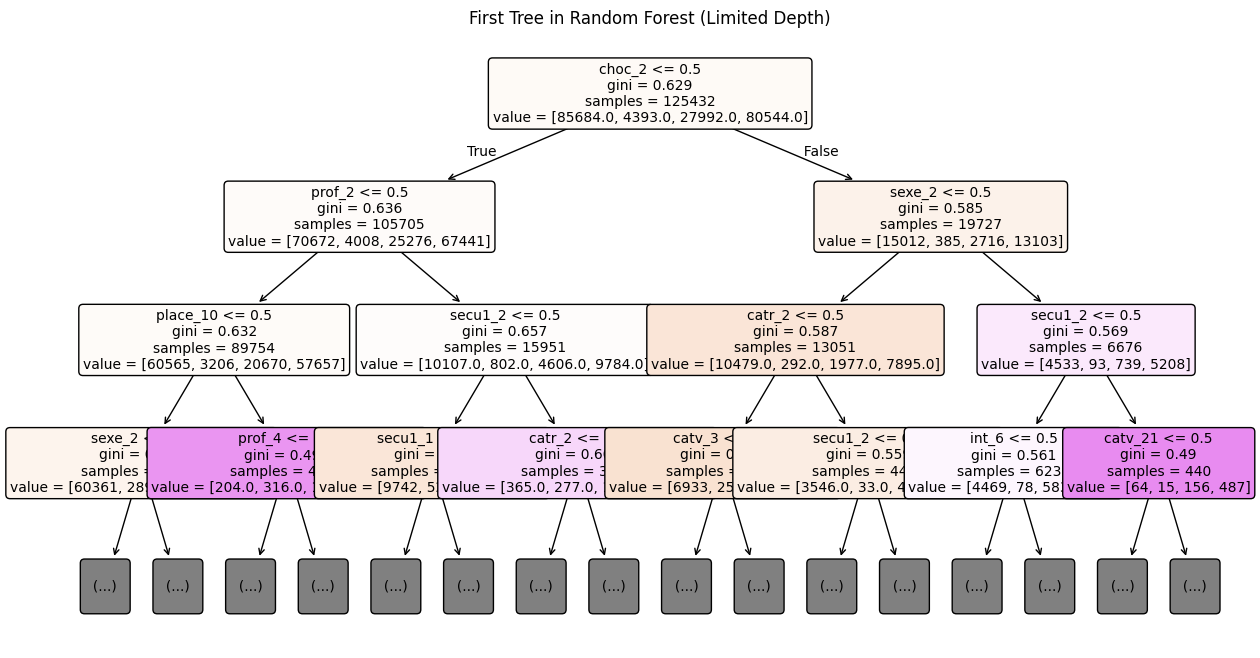

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Random Forest modéle
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

# Entrainement
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluations des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# rapport de classification
print(classification_report(y_test, y_pred))

# Extraction du premier arbre
tree = rf_model.estimators_[0]

# Visualisation
plt.figure(figsize=(15, 8))
plot_tree(tree, filled=True, feature_names=X_train.columns, 
          rounded=True, fontsize=10, max_depth=3)  
plt.title("First Tree in Random Forest (Limited Depth)")
plt.show()


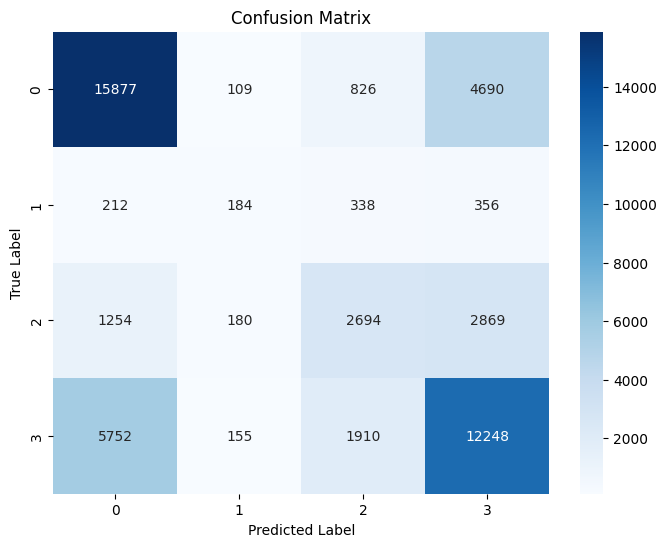

In [38]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [39]:
# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")



Model Accuracy: 0.6187


In [40]:
# Feature importances
feature_importances = tree_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Ranking:")
print(features_df)


top_n = 10  
top_features = features_df.head(top_n)
print(f"Top {top_n} Features:")
print(top_features)


Feature Importance Ranking:
    Feature  Importance
0      mois    0.165529
75  secu1_1    0.131829
1       vma    0.046465
40   catv_1    0.037583
22   prof_2    0.031288
..      ...         ...
48  catv_41    0.000108
49  catv_42    0.000106
45  catv_35    0.000102
79  secu1_5    0.000097
81  secu1_7    0.000000

[84 rows x 2 columns]
Top 10 Features:
    Feature  Importance
0      mois    0.165529
75  secu1_1    0.131829
1       vma    0.046465
40   catv_1    0.037583
22   prof_2    0.031288
2     agg_2    0.029140
74   sexe_2    0.022841
82  secu1_8    0.021711
72   catu_2    0.021509
3     int_2    0.019961


Model Accuracy: 0.6187


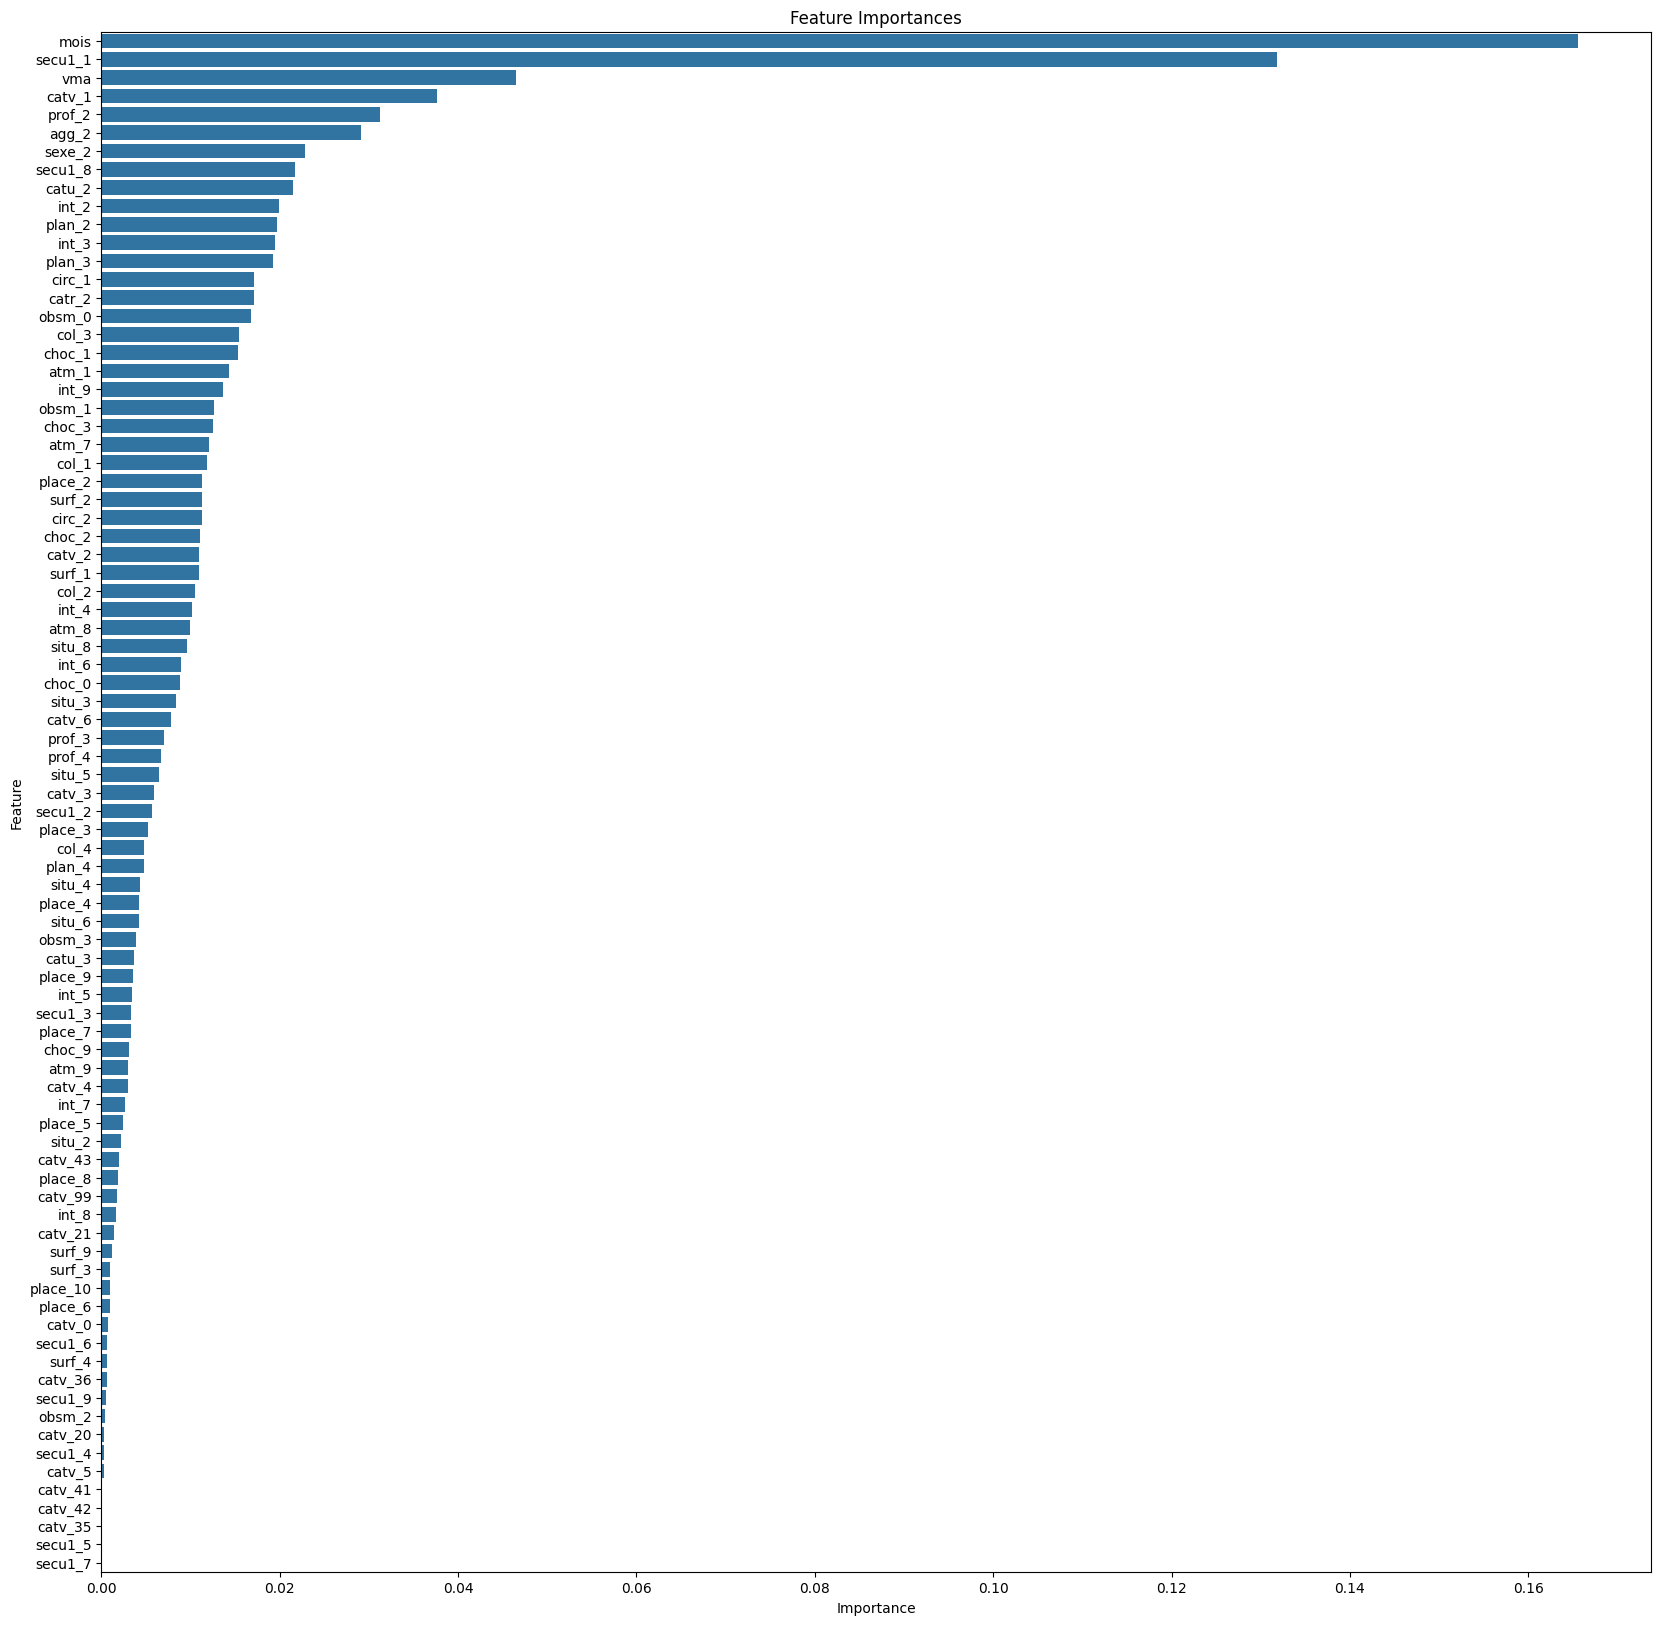

Top 10 Features:
    Feature  Importance
0      mois    0.165529
75  secu1_1    0.131829
1       vma    0.046465
40   catv_1    0.037583
22   prof_2    0.031288
2     agg_2    0.029140
74   sexe_2    0.022841
82  secu1_8    0.021711
72   catu_2    0.021509
3     int_2    0.019961


In [41]:
# Score de precision

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

feature_importances = tree_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

top_n = 10 
top_features = features_df.head(top_n)
print(f"Top {top_n} Features:")
print(top_features)


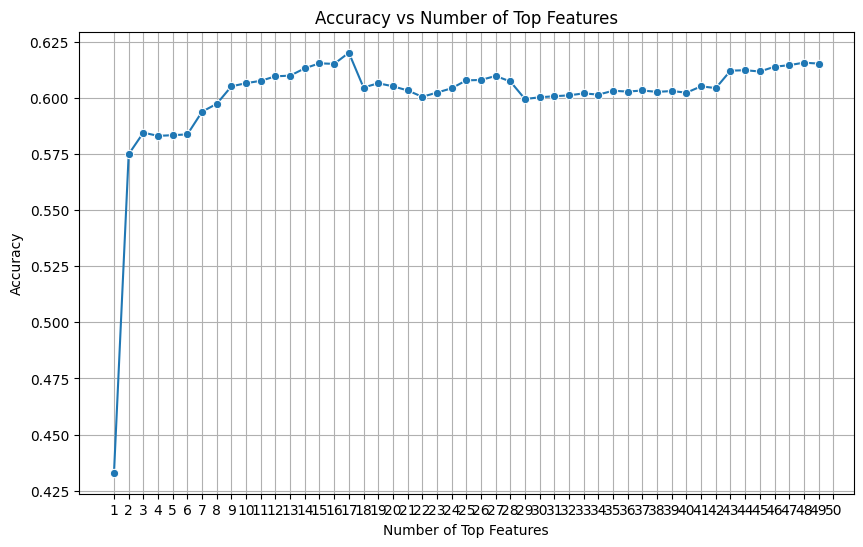

In [42]:
# Score de precision en fonction du nombre de feautures
accuracy_scores = []


for top_n in range(1, 50):
   
    top_features = features_df.head(top_n)['Feature'].values
    top_features = [feature for feature in top_features if feature != 'Num_Acc']  # Remove 'Num_Acc'

   
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]

   
    tree_model_top = DecisionTreeClassifier(random_state=42)

  
    tree_model_top.fit(X_train_top, y_train)

  
    y_pred_top = tree_model_top.predict(X_test_top)

   
    accuracy_top = accuracy_score(y_test, y_pred_top)
    accuracy_scores.append(accuracy_top)


plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 50), y=accuracy_scores, marker='o')
plt.title('Accuracy vs Number of Top Features')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, 51))  # Make sure the x-axis labels match the top_n values
plt.grid(True)
plt.show()


In [44]:
#Grid Search

top_n = 32
top_features = features_df.head(top_n)['Feature'].values
top_features = [feature for feature in top_features if feature != 'Num_Acc']  # Remove 'Num_Acc'

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_top, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_top)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy:.4f}")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy with Best Hyperparameters: 0.6183
